In [9]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file = '/content/drive/MyDrive/Colab Notebooks/gangnam/youngrae/age_person.csv'

df = pd.read_csv(file, encoding='euc-kr')
df.head()

,행정구역,2024년02월_거주자_총인구수,2024년02월_거주자_연령구간인구수,2024년02월_거주자_10~19세,2024년02월_거주자_20~29세,2024년02월_남_거주자_총인구수,2024년02월_남_거주자_연령구간인구수,2024년02월_남_거주자_10~19세,2024년02월_남_거주자_20~29세,2024년02월_여_거주자_총인구수,2024년02월_여_거주자_연령구간인구수,2024년02월_여_거주자_10~19세,2024년02월_여_거주자_20~29세
0,서울특별시 서울특별시 강남구 (1168000000),"546,328","129,802","62,654","67,148","261,120","64,348","32,757","31,591","285,208","65,454","29,897","35,557"
1,서울특별시 강남구 신사동(1168051000),"15,118","3,356","1,486","1,870","7,063","1,608",752,856,"8,055","1,748",734,"1,014"
2,서울특별시 강남구 논현1동(1168052100),"20,436","4,589",810,"3,779","9,599","2,060",397,"1,663","10,837","2,529",413,"2,116"
3,서울특별시 강남구 논현2동(1168053100),"19,892","4,327","1,192","3,135","9,185","1,963",601,"1,362","10,707","2,364",591,"1,773"
4,서울특별시 강남구 압구정동(1168054500),"25,091","5,359","2,640","2,719","11,636","2,572","1,285","1,287","13,455","2,787","1,355","1,432"


In [4]:
# "서울특별시 강남구"를 빈 문자열("")로 바꿈
df['행정구역'] = df['행정구역'].str.replace('서울특별시 강남구', '')

In [5]:
df['행정구역'] = df['행정구역'].str.replace('서울특별시', '강남구')

In [6]:
# 변수명 변경
df = df.rename(columns=lambda x: x.replace('2024년02월_', ''))

# 결과 확인
df.columns

Index(['행정구역', '거주자_총인구수', '거주자_연령구간인구수', '거주자_10~19세', '거주자_20~29세',
       '남_거주자_총인구수', '남_거주자_연령구간인구수', '남_거주자_10~19세', '남_거주자_20~29세',
       '여_거주자_총인구수', '여_거주자_연령구간인구수', '여_거주자_10~19세', '여_거주자_20~29세'],
      dtype='object')

In [7]:
# 이름 문자열의 마지막 12자리 제거
df['행정구역'] = df['행정구역'].apply(lambda x: x[:-12])

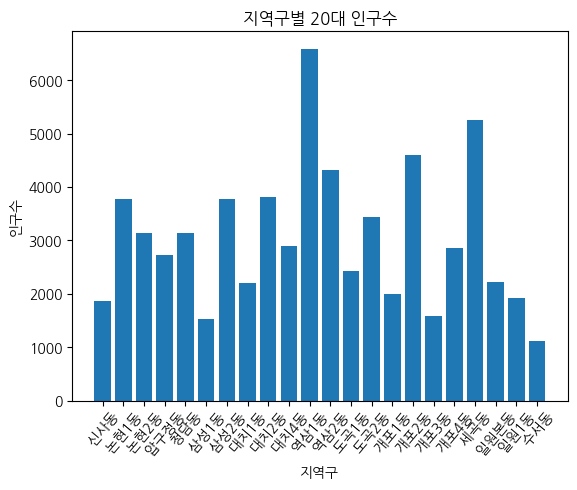

In [10]:
region_20s = df['행정구역']
population_20s = df['거주자_20~29세']

region_20s = region_20s[1:]
population_20s = population_20s[1:]

population_20s = population_20s.str.replace(',', '').astype(int)

plt.bar(region_20s, population_20s)
plt.xlabel('지역구')
plt.ylabel('인구수')
plt.title('지역구별 20대 인구수')
plt.rc('font', family='NanumGothic')

plt.xticks(rotation=50)

plt.show()


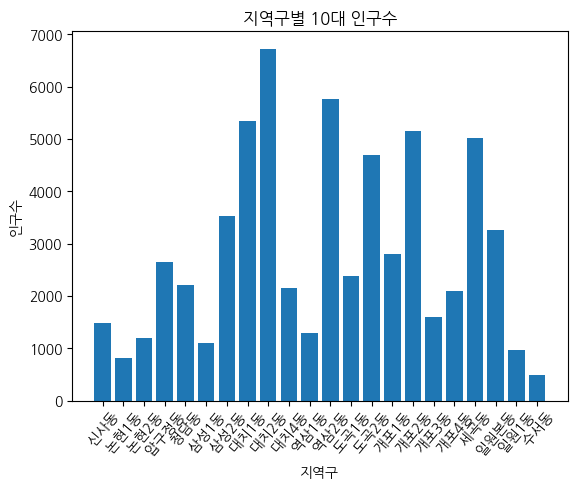

In [11]:
region_10s = df['행정구역']
population_10s = df['거주자_10~19세']

region_10s = region_10s[1:]
population_10s = population_10s[1:]

population_10s = population_10s.str.replace(',', '').astype(int)

plt.bar(region_10s, population_10s)
plt.xlabel('지역구')
plt.ylabel('인구수')
plt.title('지역구별 10대 인구수')
plt.rc('font', family='NanumGothic')

plt.xticks(rotation=50)

plt.show()


In [13]:
group_data_10s= df['행정구역']
group_per_data_10s= df['거주자_10~19세']

In [14]:
group_data_10s = group_data_10s[1:]
group_per_data_10s = group_per_data_10s[1:]

In [15]:
group_data_10s = group_data_10s.str.replace('1', '')
group_data_10s = group_data_10s.str.replace('2', '')
group_data_10s = group_data_10s.str.replace('3', '')
group_data_10s = group_data_10s.str.replace('4', '')

In [16]:
group_data_10s

1       신사동
2       논현동
3       논현동
4      압구정동
5       청담동
6       삼성동
7       삼성동
8       대치동
9       대치동
10      대치동
11      역삼동
12      역삼동
13      도곡동
14      도곡동
15      개포동
16      개포동
17      개포동
18      개포동
19      세곡동
20     일원본동
21      일원동
22      수서동
Name: 행정구역, dtype: object

In [17]:
group_data_10s = group_data_10s.str.replace(' ', '')

In [18]:
# Remove commas from group_per_data_10s
group_per_data_10s = group_per_data_10s.str.replace(',', '')

# Now convert to integer
group_per_data_10s = group_per_data_10s.astype('int')

In [19]:
group_per_data_10s.head()

1    1486
2     810
3    1192
4    2640
5    2208
Name: 거주자_10~19세, dtype: int64

In [20]:
# 두 데이터프레임을 결합합니다.
combined_data = pd.concat([group_data_10s, group_per_data_10s], axis=1)

# 같은 데이터 이름을 가진 데이터들을 합쳐 표현합니다.
combined_data = combined_data.groupby('행정구역').sum()

# 결과 출력
print(combined_data)

      거주자_10~19세
행정구역            
개포동        11649
논현동         2002
대치동        14212
도곡동         7073
삼성동         4614
세곡동         5022
수서동          482
신사동         1486
압구정동        2640
역삼동         7042
일원동          971
일원본동        3253
청담동         2208


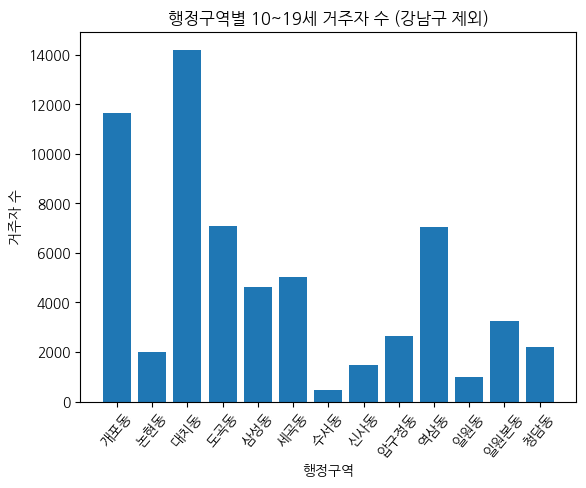

In [21]:
# 막대 그래프 생성
plt.bar(combined_data.index, combined_data['거주자_10~19세'])

# 제목 설정
plt.title('행정구역별 10~19세 거주자 수 (강남구 제외)')

# x축 레이블 설정
plt.xlabel('행정구역')

# y축 레이블 설정
plt.ylabel('거주자 수')
plt.xticks(rotation=50)

# 그래프 출력
plt.show()


In [22]:
group_data_20s= df['행정구역']
group_per_data_20s= df['거주자_20~29세']
group_data_20s = group_data_20s[1:]
group_per_data_20s = group_per_data_20s[1:]
group_data_20s = group_data_20s.str.replace('1', '')
group_data_20s = group_data_20s.str.replace('2', '')
group_data_20s = group_data_20s.str.replace('3', '')
group_data_20s = group_data_20s.str.replace('4', '')
group_per_data_20s = group_per_data_20s.str.replace(',', '')
group_per_data_20s = group_per_data_20s.astype('int')
combined_data_20s = pd.concat([group_data_20s, group_per_data_20s], axis=1)
combined_data_20s = combined_data_20s.groupby('행정구역').sum()

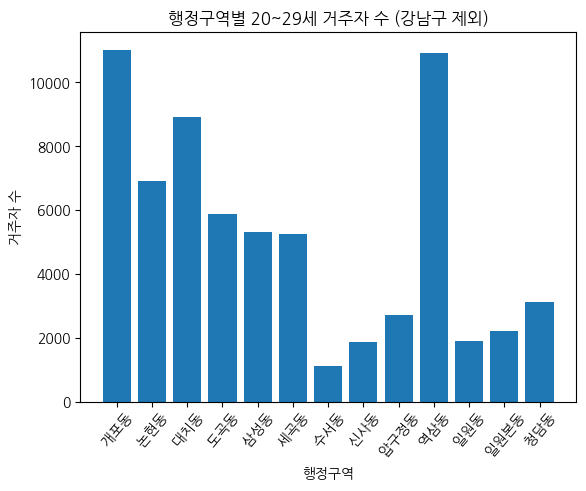

In [23]:
plt.bar(combined_data_20s.index, combined_data_20s['거주자_20~29세'])

plt.title('행정구역별 20~29세 거주자 수 (강남구 제외)')

plt.xlabel('행정구역')

plt.ylabel('거주자 수')
plt.xticks(rotation=50)

plt.show()
